#### Data in the Class

## Components of a Network
1. Nodes
2. Edges
3. Attributes/Relationships/Connections

In [25]:
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


## Step 3: Load the CSV Files

We will load the data from two CSV files. One file contains information about the nodes (entities) in our network, and the other contains information about the edges (connections) between those nodes.

In [31]:
# Load the node and edge CSV files
nodes_df = pd.read_csv('nodes.csv', header = 1)
edges_df = pd.read_csv('edges.csv', header = 1)

In [43]:
# Display the data to check the structure
print("Nodes DataFrame:")
print(nodes.head())

print("\nEdges DataFrame:")
print(edges_df.head())

Nodes DataFrame:
  ID Attribute #1  Attribute #2
0  A          Red           NaN
1  B         Blue           NaN
2  C        Green           NaN
3  E       Yellow           NaN

Edges DataFrame:
  Source Target  Weight
0      A      B       1
1      A      C       2
2      B      E       3
3      C      E       2


## Step 4: Create an Adjacency Matrix

An adjacency matrix is a way of representing which nodes (entities) in a network are connected to which other nodes.

In [44]:
# Initialize an empty graph
G = nx.Graph()

# Add nodes to the graph
for index, row in nodes_df.iterrows():
    G.add_node(row['ID'], **row.to_dict())

# Add edges to the graph
for index, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Create the adjacency matrix
adj_matrix = nx.adjacency_matrix(G).todense()

# Convert to DataFrame for better readability
adj_matrix_df = pd.DataFrame(adj_matrix, index=G.nodes(), columns=G.nodes())

print("Adjacency Matrix:")
print(adj_matrix_df)


Adjacency Matrix:
   A  B  C  E
A  0  1  2  0
B  1  0  0  3
C  2  0  0  2
E  0  3  2  0


## Step 5: Visualize the Network

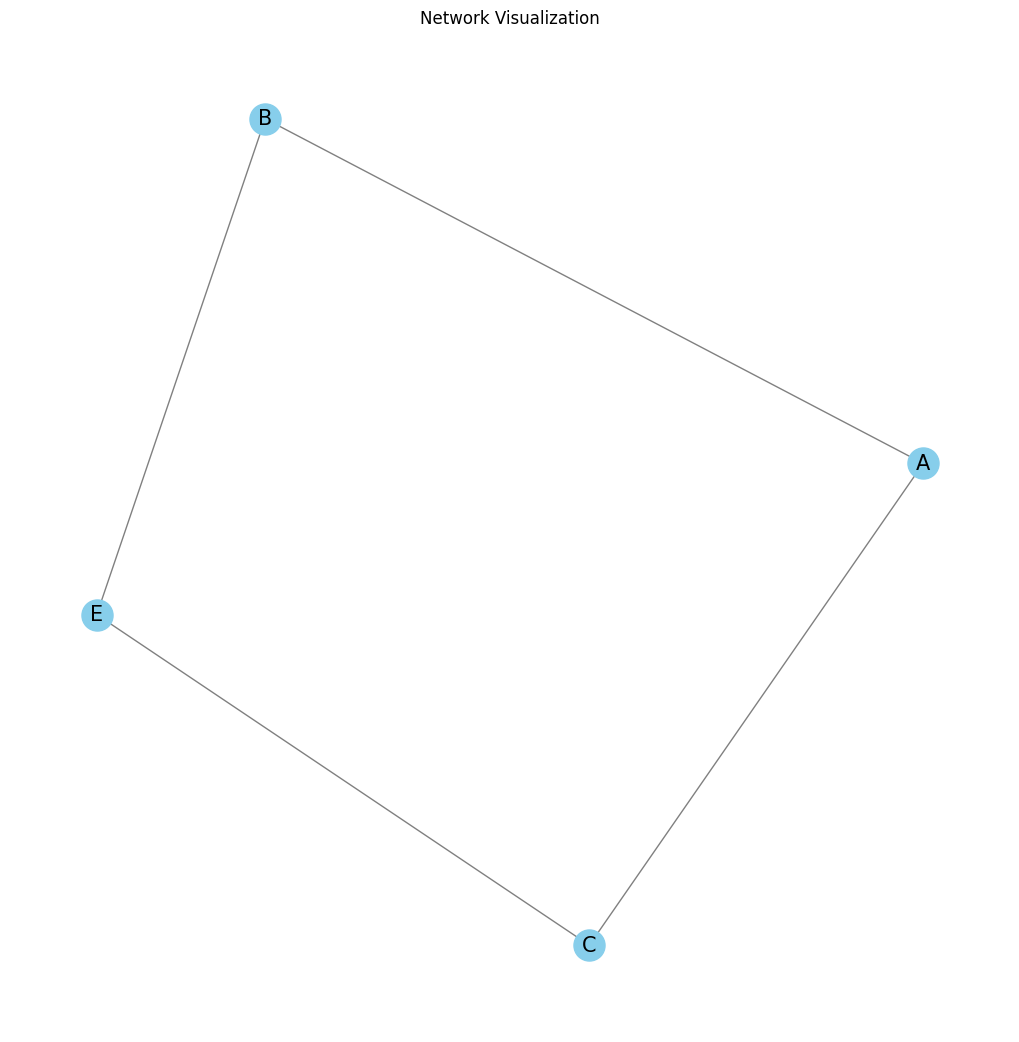

In [45]:
# Draw the network
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Position nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=15, font_color='black', edge_color='gray')
plt.title("Network Visualization")
plt.show()


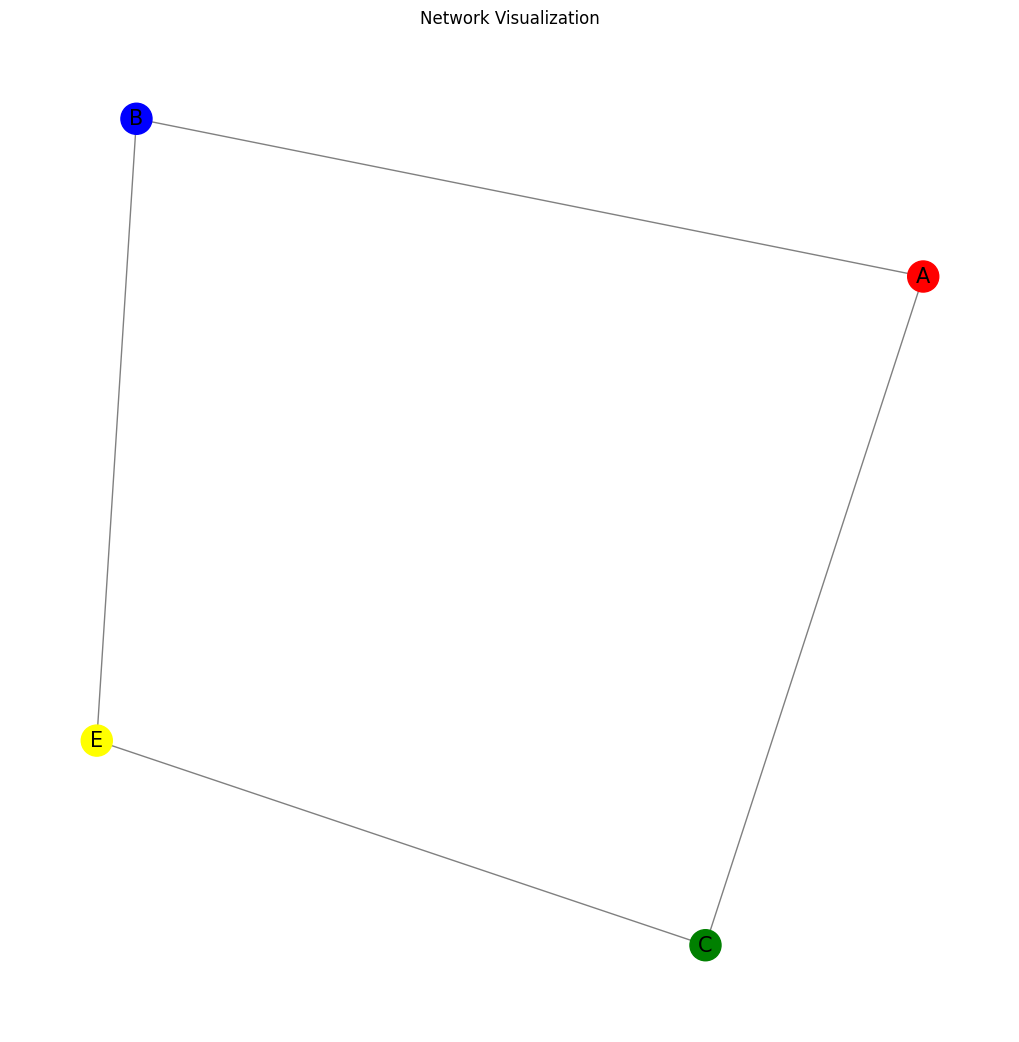

In [46]:
# Draw the network
# Color nodes based on attribute #1
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Position nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_size=500, node_color=nodes_df['Attribute #1'], font_size=15, font_color='black', edge_color='gray')
plt.title("Network Visualization")
plt.show()


## Centrality Measures

Betweenness Centrality:
  Node  Betweenness Centrality
0    A                0.166667
1    B                0.166667
2    C                0.166667
3    E                0.166667


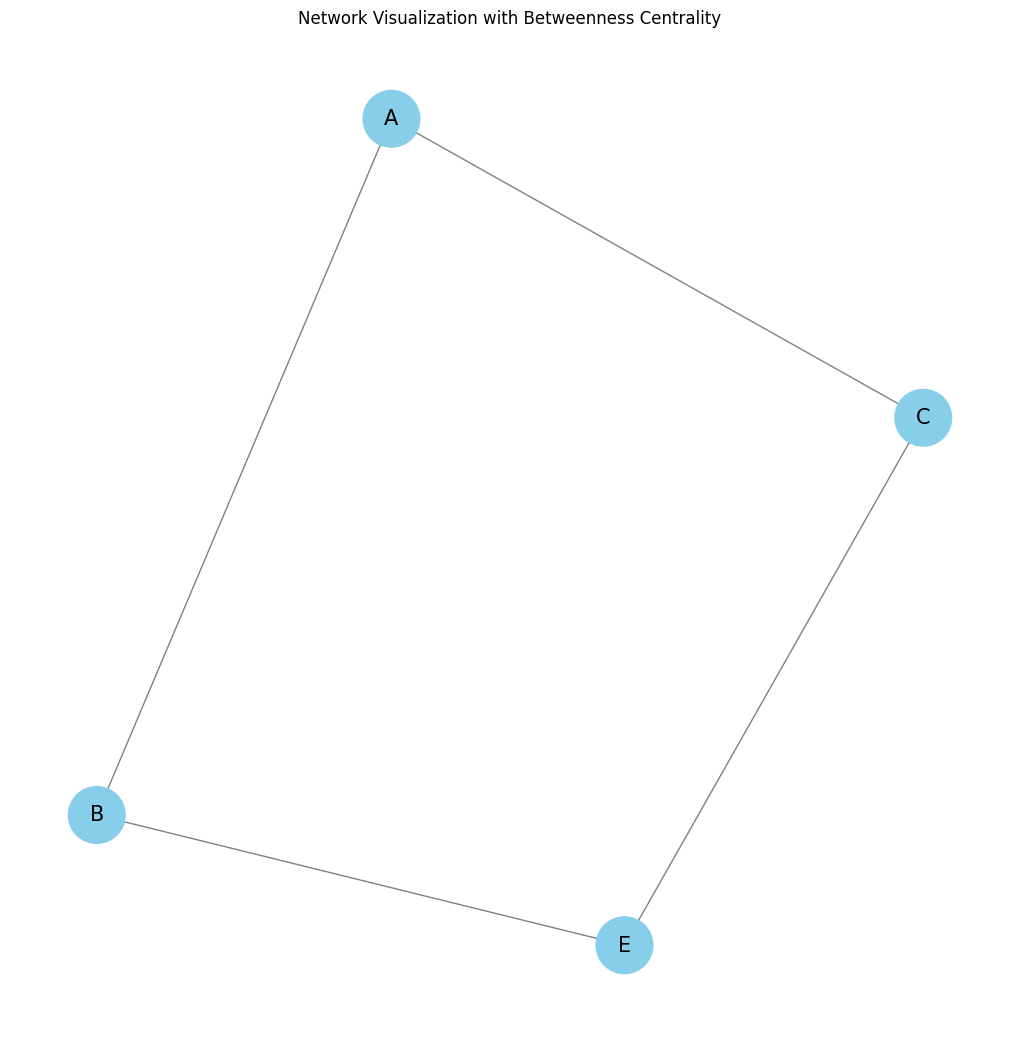

In [47]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality_df = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

print("Betweenness Centrality:")
print(betweenness_centrality_df)

# Visualize betweenness centrality
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
node_size = [v * 10000 for v in betweenness_centrality.values()]
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color='skyblue', font_size=15, font_color='black', edge_color='gray')
plt.title("Network Visualization with Betweenness Centrality")
plt.show()

Degree Centrality:
  Node  Degree Centrality
0    A           0.666667
1    B           0.666667
2    C           0.666667
3    E           0.666667


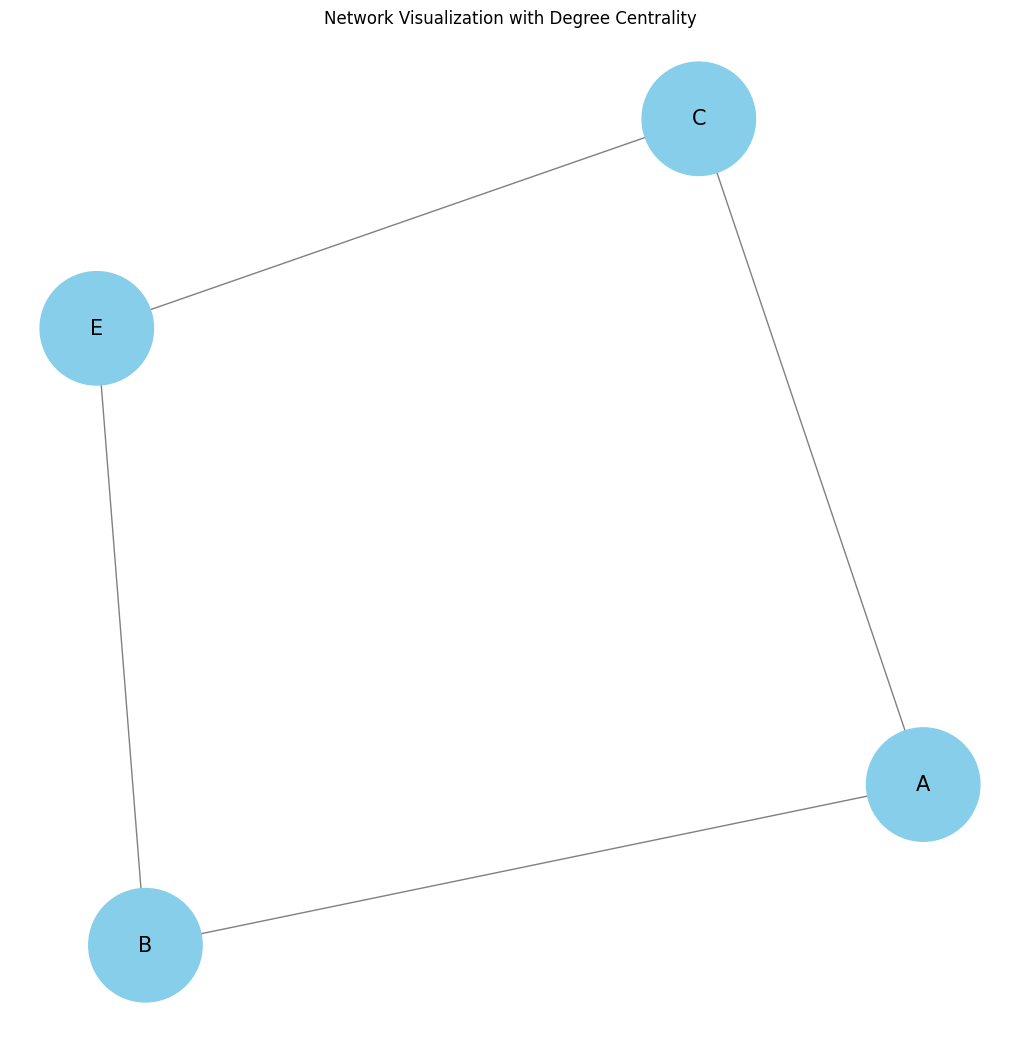

In [48]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
degree_centrality_df = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

print("Degree Centrality:")
print(degree_centrality_df)

# Visualize degree centrality
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
node_size = [v * 10000 for v in degree_centrality.values()]
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color='skyblue', font_size=15, font_color='black', edge_color='gray')
plt.title("Network Visualization with Degree Centrality")
plt.show()

Closeness Centrality:
  Node  Closeness Centrality
0    A                  0.75
1    B                  0.75
2    C                  0.75
3    E                  0.75


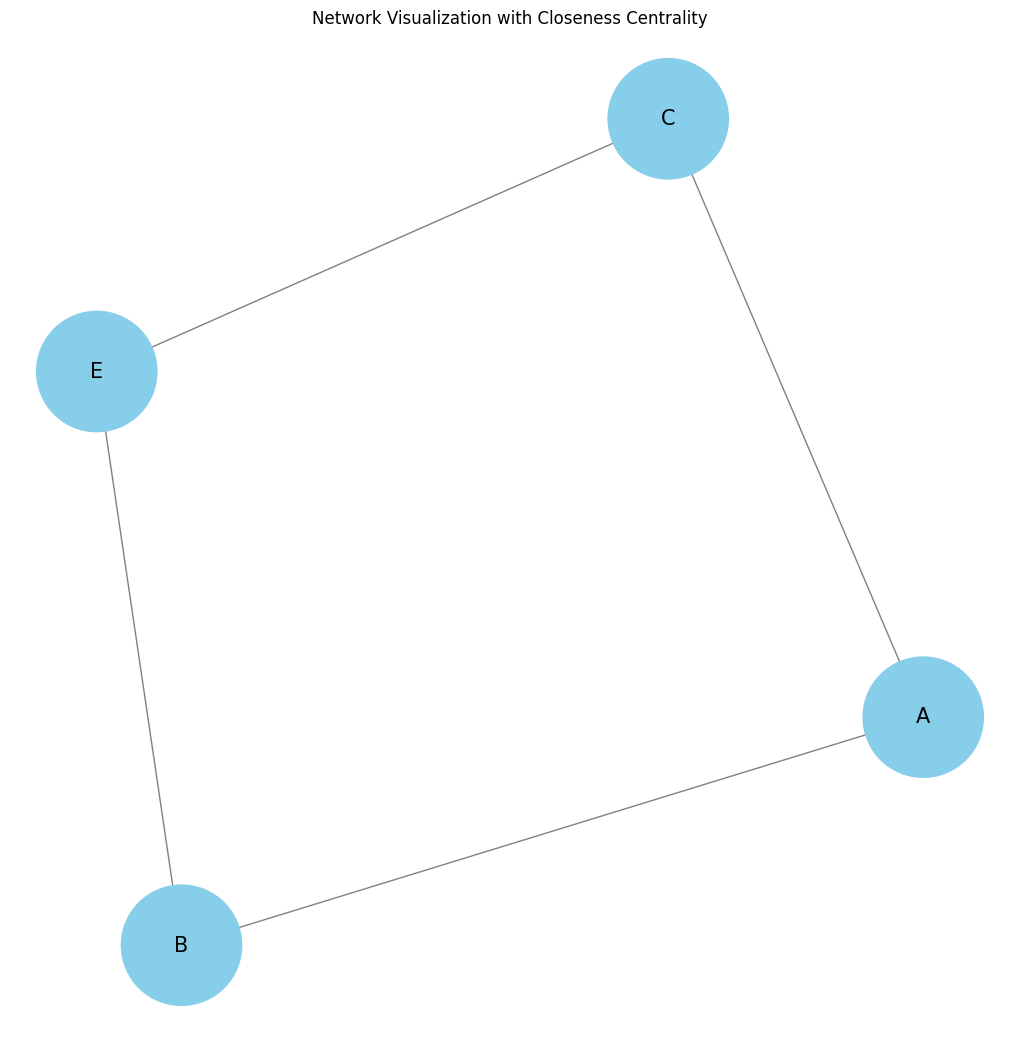

In [49]:
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality_df = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])

print("Closeness Centrality:")
print(closeness_centrality_df)

# Visualize closeness centrality
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
node_size = [v * 10000 for v in closeness_centrality.values()]
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color='skyblue', font_size=15, font_color='black', edge_color='gray')
plt.title("Network Visualization with Closeness Centrality")
plt.show()